# Анализ данных из Росстат

In [2]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# загрузка данных
raw_stat_data = pd.read_excel("https://rosstat.gov.ru/storage/mediabank/MaZGpzzY/cen-god.xls", skiprows=2, decimal=",").dropna()
raw_stat_data.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84
5,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5


In [4]:
# узнаем форму таблицы
raw_stat_data.shape

(84, 31)

In [5]:
# проверяем индексы столбцов
raw_stat_data.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020],
      dtype='object')

In [6]:
raw_stat_data[' ПОКАЗАТЕЛИ ']

1                     Говядина (кроме бескостного мяса)
2                      Свинина (кроме бескостного мяса)
3                        Куры охлажденные и мороженые1)
4                                     Колбаса вареная2)
5                              Консервы мясные3), 350 г
                            ...                        
82             Посещение детского ясли-сада, за день30)
83                               Санаторий31), за день 
84                   Дом отдыха, пансионат32), за день 
85    Первичный консультативный прием у врача-специа...
86                                Общий анализ крови33)
Name:  ПОКАЗАТЕЛИ , Length: 84, dtype: object

In [7]:
# информация по датафрейму
raw_stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 86
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    ПОКАЗАТЕЛИ   84 non-null     object 
 1   1991          84 non-null     object 
 2   1992          84 non-null     object 
 3   1993          84 non-null     object 
 4   1994          84 non-null     object 
 5   1995          84 non-null     object 
 6   1996          84 non-null     object 
 7   1997          84 non-null     object 
 8   1998          84 non-null     object 
 9   1999          84 non-null     object 
 10  2000          84 non-null     object 
 11  2001          84 non-null     object 
 12  2002          84 non-null     object 
 13  2003          84 non-null     object 
 14  2004          84 non-null     object 
 15  2005          84 non-null     object 
 16  2006          84 non-null     object 
 17  2007          84 non-null     object 
 18  2008          84 non-null     ob

In [8]:
# изучаем все значения
raw_stat_data.values[:100]

array([['Говядина (кроме бескостного мяса)', 15.54, 221.5, ..., 330.58,
        350.05, 361.04],
       ['Свинина (кроме бескостного мяса)', 14.38, 260, ..., 275.26,
        264.55, 269.14],
       ['Куры охлажденные и мороженые1)', 13.57, 194.76, ..., 151.27,
        143.13, 145.55],
       ...,
       ['Дом отдыха, пансионат32), за день ', 19.64, '360.03', ...,
        1869.54, 1937.53, 2000.21],
       ['Первичный консультативный прием у врача-специалиста', 10.5,
        122.61, ..., 724.61, 780.86, 810.75],
       ['Общий анализ крови33)', 4.54, 48.02, ..., 382.06, 398.49,
        398.71]], dtype=object)

In [9]:
# извлекаем уникальные значения
raw_stat_data.loc[:, 2001].unique()

array([70.33, 79.22, 56.92, 96.01, 24.07, 36.57, 75.98, 25.08, 71.73,
       33.07, 11.37, 103.06, 18.84, 14.88, 155.92, 8.48, 13.69, 13.55,
       19.43, 6.33, 5.99, 8.34, 27.59, 94.76, 368.08, 105.28, 22.91,
       1632.26, 2245.35, 270.48, 543.59, 23.72, 35.37, 1093.47, 2098.8,
       1246.97, 8.44, 42.65, 6.78, 247.95, 2439.66, 2295.39, 7811.84,
       335.63, 2876.98, 147.03, 417.61, 6.52, 5.17, 2.35, 1.47, 45.1,
       179.32, 196.33, 148.5, 13.13, 68.17, 59.83, 705.62, 626.94, 3.21,
       3.29, 3.16, 4.56, 3.11, 66.92, 2.15, 25.94, '…', 30.91, 2.87, 6.89,
       52.31, 34.39, 45.08, 11.57, 444.06, 352.04, 76.6, 46.89],
      dtype=object)

In [10]:
# транспонирование 
stat_data = raw_stat_data.T
# stat_data.head(10)
stat_data.loc[:, :15]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),"Молоко питьевое цельное пастеризованное 2,5-3...",Сыры сычужные твердые и мягкие,"Яйца куриные, за 10 шт.",Сахар-песок,Чай черный байховый
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,0.6,13.2,4.47,2.45,21.21
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,22.4,415,87.1,135.5,1136.6
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,315.21,2756.82,827.07,754.98,4864.96
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,1222.18,8583.13,2657.27,2241.39,12741.6
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,2812,22514,5345,4486,25747
1996,14137,16810,13815,22859,7375,9398,19912,8540,22968,8412,3187,24828,5879,3681,28443
1997,15787,19055,16061,26767,7811,9912,21402,8468,23238,9589,3627,27025,5687,4326,33527
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,5.82,56.33,14.94,12.69,122
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,8,74.32,14.94,9.2,140.45


In [11]:
# в качкстве ключей столбцов установим значения строки "Показатели"
stat_data.columns = stat_data.loc[' ПОКАЗАТЕЛИ ', :]
stat_data = stat_data.iloc[1:, :]
stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [12]:
# заменяем "..." на 0.0
stat_data = stat_data.replace('...', 0.0)
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [13]:
# изучаем один из столбцов
stat_data['Линолеум, за м2']

1991          …
1992          0
1993          0
1994    17314.1
1995      45899
1996      50153
1997      50943
1998      94.84
1999     121.82
2000     136.02
2001     147.03
2002     156.94
2003     164.09
2004     173.89
2005     188.47
2006     198.66
2007     211.64
2008     242.56
2009     289.31
2010     299.74
2011     327.47
2012     350.36
2013     366.51
2014     409.58
2015     474.68
2016     507.99
2017     506.83
2018     528.57
2019     541.81
2020     545.77
Name: Линолеум, за м2, dtype: object

In [14]:
stat_data = stat_data.replace('…', 0.0)
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1991 to 2020
Data columns (total 84 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 30 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  30 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    30 non-null     float64
 3   Колбаса вареная2)                                                                                 30 non-null     float64
 4   Консервы мясные3), 350 г                                                                          30 non-null     float64
 5   Рыб

In [15]:
# изучаем один из столбцов
stat_data['Бензин автомобильный марки А-76 (АИ-80)17), за л']

1991      0.51
1992      27.8
1993    175.59
1994    595.76
1995      1681
1996      1805
1997      1827
1998      1.96
1999      5.75
2000      7.35
2001      6.52
2002      7.58
2003      9.06
2004     12.46
2005     14.32
2006     15.75
2007     17.01
2008     17.41
2009     19.16
2010     20.09
2011     24.65
2012     26.56
2013     27.91
2014     30.41
2015     32.23
2016     33.59
2017     35.22
2018         -
2019         -
2020         -
Name: Бензин автомобильный марки А-76 (АИ-80)17), за л, dtype: object

In [16]:
stat_data = stat_data.replace('-', 0.0)
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1991 to 2020
Data columns (total 84 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 30 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  30 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    30 non-null     float64
 3   Колбаса вареная2)                                                                                 30 non-null     float64
 4   Консервы мясные3), 350 г                                                                          30 non-null     float64
 5   Рыб

In [17]:
# выводим уникальные значения по выбранному столбцу
stat_data["Кинотеатры, за билет"].unique()

array([1.89, 23.82, 498, 1972.56, 3886, 4617, 4948, 7.36, 13.09, 23.11,
       34.39, 48.66, 58.52, 74.73, 88.63, 103.34, 114.32, 134.86, 151.79,
       '167.19', 202.04, 215.67, 228.78, 240.57, 256.53, 259.63, 260.5,
       263.13, 266.02, 272.87], dtype=object)

In [18]:
# конвертируем строковые числа в числа с плавающей точкой
stat_data = stat_data.astype(np.float64)
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1991 to 2020
Data columns (total 84 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 30 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  30 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    30 non-null     float64
 3   Колбаса вареная2)                                                                                 30 non-null     float64
 4   Консервы мясные3), 350 г                                                                          30 non-null     float64
 5   Рыб

In [1]:
!pip install pandas==1.0.1

In [19]:
# выводим индексы столбцов
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [20]:
# удаление лишних символов пробела из индексов столбцов
stat_data.columns = stat_data.columns.str.strip(" ")
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [21]:
stat_data['Говядина (кроме бескостного мяса)']

1991       15.54
1992      221.50
1993     2201.27
1994     5186.28
1995    12547.00
1996    14137.00
1997    15787.00
1998       30.04
1999       42.01
2000       52.72
2001       70.33
2002       72.56
2003       73.90
2004       93.41
2005      115.77
2006      131.67
2007      139.49
2008      174.86
2009      185.60
2010      197.64
2011      234.49
2012      248.47
2013      244.55
2014      272.28
2015      314.94
2016      315.02
2017      320.34
2018      330.58
2019      350.05
2020      361.04
Name: Говядина (кроме бескостного мяса), dtype: float64

In [22]:
# удаляем данные до 1997 года
stat_data_1 = stat_data.iloc[7:, :]
stat_data_1['Говядина (кроме бескостного мяса)']

1998     30.04
1999     42.01
2000     52.72
2001     70.33
2002     72.56
2003     73.90
2004     93.41
2005    115.77
2006    131.67
2007    139.49
2008    174.86
2009    185.60
2010    197.64
2011    234.49
2012    248.47
2013    244.55
2014    272.28
2015    314.94
2016    315.02
2017    320.34
2018    330.58
2019    350.05
2020    361.04
Name: Говядина (кроме бескостного мяса), dtype: float64

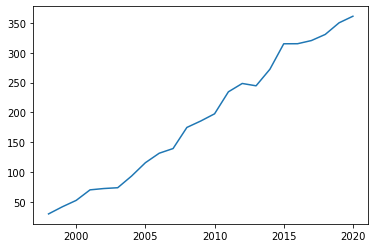

In [25]:
# рисуем график

# извлечение значений
prices_1 = stat_data_1['Говядина (кроме бескостного мяса)']
years = stat_data_1.index.astype(int)
plt.plot(years, prices_1)
plt.show()